<img src="./julia_logo.png" align="center" width="400"/>

System information (for reproducibility)

In [1]:
versioninfo()

Julia Version 1.11.4
Commit 8561cc3d68d (2025-03-10 11:36 UTC)
Build Info:
  Official https://julialang.org/ release
Platform Info:
  OS: macOS (arm64-apple-darwin24.0.0)
  CPU: 12 × Apple M2 Max
  WORD_SIZE: 64
  LLVM: libLLVM-16.0.6 (ORCJIT, apple-m2)
Threads: 8 default, 0 interactive, 4 GC (on 8 virtual cores)
Environment:
  JULIA_NUM_THREADS = 8
  JULIA_EDITOR = code


Load packages:

In [2]:
using Pkg
Pkg.activate(pwd())
Pkg.instantiate()
Pkg.status()

  Activating project at `~/Documents/github.com/ucla-biostat-257/2025spring/slides/03-juliaintro`
    Updating registry at `~/.julia/registries/General.toml`
   Installed PDMats ─ v0.11.33
    Updating `~/Documents/github.com/ucla-biostat-257/2025spring/slides/03-juliaintro/Project.toml`
  [6e4b80f9] + BenchmarkTools v1.6.0
  [31c24e10] + Distributions v0.25.118
  [6f49c342] + RCall v0.14.6
  [37e2e46d] ~ LinearAlgebra ⇒ v1.11.0
  [9abbd945] ~ Profile ⇒ v1.11.0
  [2f01184e] ~ SparseArrays ⇒ v1.11.0
    Updating `~/Documents/github.com/ucla-biostat-257/2025spring/slides/03-juliaintro/Manifest.toml`
  [66dad0bd] + AliasTables v1.1.3
  [6e4b80f9] + BenchmarkTools v1.6.0
  [324d7699] + CategoricalArrays v0.10.8
  [34da2185] + Compat v4.16.0
  [8f4d0f93] + Conda v1.10.2
  [a8cc5b0e] + Crayons v4.1.1
  [9a962f9c] + DataAPI v1.16.0
  [a93c6f00] + DataFrames v1.7.0
  [864edb3b] + DataStructures v0.18.22
  [e2d170a0] + DataValueInterfaces v1.0.0
  [31c24e10] + Distributions v0.25.118
  [ffbed15

Status `~/Documents/github.com/ucla-biostat-257/2025spring/slides/03-juliaintro/Project.toml`
  

   2700.3 ms  ✓ Distributions
  3 dependencies successfully precompiled in 4 seconds. 86 already precompiled.


[6e4b80f9] BenchmarkTools v1.6.0
  [31c24e10] Distributions v0.25.118
  [6f49c342] RCall v0.14.6
  [37e2e46d] LinearAlgebra v1.11.0
  [9abbd945] Profile v1.11.0
  [2f01184e] SparseArrays v1.11.0


In [3]:
using BenchmarkTools, Distributions, RCall
using LinearAlgebra, Profile, SparseArrays

[ Info: Precompiling Distributions [31c24e10-a181-5473-b8eb-7969acd0382f] (cache misses: wrong dep version loaded (6), incompatible header (14))


## What's Julia?

> Julia is a high-level, high-performance dynamic programming language for technical computing, with syntax that is familiar to users of other technical computing environments

* History:
  - Project started in 2009. First public release in 2012 
  - Creators: Jeff Bezanson, Alan Edelman, Stefan Karpinski, Viral Shah
  - First major release v1.0 was released on Aug 8, 2018
  - Current stable release v1.11.4 (as of Apr 1, 2025)

* Aim to solve the notorious **two language problem**: Prototype code goes into high-level languages like R/Python, production code goes into low-level language like C/C++. 

    Julia aims to:  
    
> Walks like Python. Runs like C.

<img src="./julia_vs_otherlang.png" align="center" width="600"/>

See <https://julialang.org/benchmarks/> for the details of benchmark.

* Write high-level, abstract code that closely resembles mathematical formulas
    - yet produces fast, low-level machine code that has traditionally only been generated by static languages.

* Julia is more than just "Fast R" or "Fast Matlab"
    - Performance comes from features that work well together.  
    - You can't just take the magic dust that makes Julia fast and sprinkle it on [language of choice]

## Learning resources

1. The (free) online course [Introduction to Julia](https://juliaacademy.com/p/intro-to-julia), by Jane Herriman. 

2. Cheat sheet: [The Fast Track to Julia](https://juliadocs.github.io/Julia-Cheat-Sheet/).  

3. Browse the Julia [documentation](https://docs.julialang.org/en).  

4. For Matlab users, read [Noteworthy Differences From Matlab](https://docs.julialang.org/en/v1/manual/noteworthy-differences/#Noteworthy-differences-from-MATLAB-1).  

    For R users, read [Noteworthy Differences From R](https://docs.julialang.org/en/v1/manual/noteworthy-differences/#Noteworthy-differences-from-R-1).  

    For Python users, read [Noteworthy Differences From Python](https://docs.julialang.org/en/v1/manual/noteworthy-differences/?highlight=matlab#Noteworthy-differences-from-Python-1).  

5. The [Learning page](http://julialang.org/learning/) on Julia's website has pointers to many other learning resources.  

## Julia REPL (Read-Evaluation-Print-Loop)

The `Julia` REPL, or `Julia` shell, has at least five modes.

1. **Default mode** is the Julian prompt `julia>`. Type backspace in other modes to enter default mode.    

2. **Help mode** `help?>`. Type `?` to enter help mode. `?search_term` does a fuzzy search for `search_term`.  

3. **Shell mode** `shell>`. Type `;` to enter shell mode.  

4. **Package mode** `(@v1.11) pkg>`. Type `]` to enter package mode for managing Julia packages (install, uninstall, update, ...).

5. **Search mode** `(reverse-i-search)`. Press `ctrl+R` to enter search model. 

6. With `RCall.jl` package installed, we can enter the **R mode** by typing `$` (shift+4) at Julia REPL.

Some survival commands in Julia REPL:  

1. `exit()` or `Ctrl+D`: exit Julia.

2. `Ctrl+C`: interrupt execution.

3. `Ctrl+L`: clear screen.

0. Append `;` (semi-colon) to suppress displaying output from a command. Same as Matlab.

0. `include("filename.jl")` to source a Julia code file.

## Seek help

* Online help from REPL: `?function_name`.

* Google.

* Julia documentation: <https://docs.julialang.org/en/>.

* Look up source code: `@edit sin(π)`.

* Discourse: <https://discourse.julialang.org>.

* Friends.

## Which IDE?

* Many choices: VS Code, Vim, ...

* For dynamic document, e.g., homework, I recommend [JupyterLab](http://jupyterlab.readthedocs.io/en/stable/) or VS Code (with Jupyter extension). 

* For extensive Julia coding, myself has been happily using [VS Code](https://code.visualstudio.com) with extensions `Julia` and `VS Code Jupyter Notebook Previewer` installed. 

## Julia package system

* Each Julia package is a Git repository. Each Julia package name ends with `.jl`. E.g., `Distributions.jl` package lives at <https://github.com/JuliaStats/Distributions.jl>.   
Google search with `PackageName.jl` usually leads to the package on github.com. 

* The package ecosystem is rapidly maturing; a complete list of **registered** packages (which are required to have a certain level of testing and documentation) is at [http://pkg.julialang.org/](http://pkg.julialang.org/).

* For example, the package called `Distributions.jl` is added with
```julia
# in Pkg mode
(@v1.11) pkg> add Distributions
```
and "removed" (although not completely deleted) with
```julia
# in Pkg mode
(@v1.11) pkg> rm Distributions
```
* The package manager provides a dependency solver that determines which packages are actually required to be installed.

* **Non-registered** packages are added by cloning the relevant Git repository. E.g.,
```julia
# in Pkg mode
(@v1.11) pkg> add https://github.com/OpenMendel/SnpArrays.jl
```

* A package needs only be added once, at which point it is downloaded into your local `.julia/packages` directory in your home directory. 

In [ ]:
readdir(Sys.islinux() ? ENV["JULIA_PATH"] * "/pkg/packages" : ENV["HOME"] * "/.julia/packages")

* Directory of a specific package can be queried by `pathof()`:

In [ ]:
pathof(Distributions)

* If you start having problems with packages that seem to be unsolvable, you may try just deleting your .julia directory and reinstalling all your packages. 

* Periodically, one should run `update` in Pkg mode, which checks for, downloads and installs updated versions of all the packages you currently have installed.

* `status` lists the status of all installed packages.

* Using functions in package.
```julia
using Distributions
```
This pulls all of the *exported* functions in the module into your local namespace, as you can check using the `whos()` command. An alternative is
```julia
import Distributions
```
Now, the functions from the Distributions package are available only using 
```julia
Distributions.<FUNNAME>
```
All functions, not only exported functions, are always available like this.

## Calling R from Julia

* The [`RCall.jl`](https://github.com/JuliaInterop/RCall.jl) package allows us to embed R code inside of Julia.

* There are also `PyCall.jl`, `MATLAB.jl`, `JavaCall.jl`, `CxxWrap.jl` packages for interfacing with other languages.

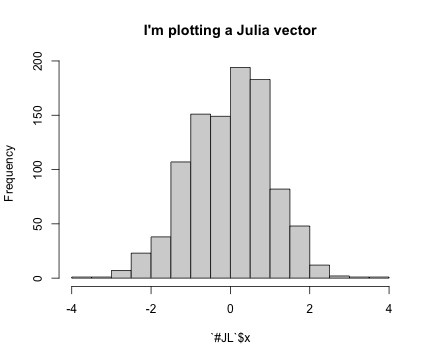

In [4]:
# x is in Julia workspace
x = randn(1000)

# $ is the interpolation operator
R"""
hist($x, main = "I'm plotting a Julia vector")
""";

┌ Warning: RCall.jl: Warning: `qplot()` was deprecated in ggplot2 3.4.0.
└ @ RCall ~/.julia/packages/RCall/0ggIQ/src/io.jl:172
┌ Warning: RCall.jl: `stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
└ @ RCall ~/.julia/packages/RCall/0ggIQ/src/io.jl:172


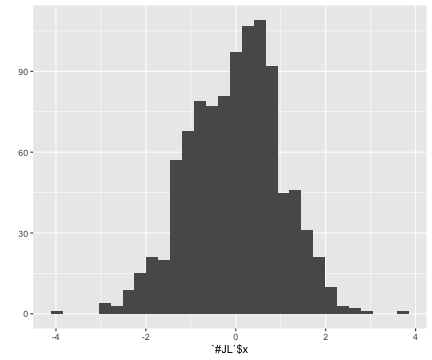

RObject{VecSxp}


In [5]:
R"""
library(ggplot2)

qplot($x)
"""

In [6]:
x = R"""
rnorm(10)
"""

RObject{RealSxp}
 [1]  0.61627420 -1.84713202  0.37646202 -1.46043652 -1.45144637 -0.08173308
 [7] -1.04115093  0.44867159  0.15836545 -0.36231736


In [7]:
# collect R variable into Julia workspace
y = collect(x)

10-element Vector{Float64}:
  0.6162742028497211
 -1.8471320210268067
  0.3764620240027404
 -1.4604365202871004
 -1.4514463658249068
 -0.08173307975492149
 -1.0411509335490703
  0.44867158796767936
  0.1583654531542542
 -0.362317362937186

* Access Julia variables in R REPL mode:
```julia
julia> x = rand(5) # Julia variable
R> y <- $x
```

* Pass Julia expression in R REPL mode:
```julia
R> y <- $(rand(5))
```

* Put Julia variable into R environment:
```julia
julia> @rput x
R> x
```

* Get R variable into Julia environment:
```julia
R> r <- 2
Julia> @rget r
```

* If you want to call Julia within R, check out the [`JuliaCall`](https://non-contradiction.github.io/JuliaCall//index.html) package.

## Some basic Julia code

In [8]:
# an integer, same as int in R
y = 1

1

In [9]:
# query type of a Julia object
typeof(y)

Int64

In [10]:
# a Float64 number, same as double in R
y = 1.0

1.0

In [11]:
typeof(y) 

Float64

In [12]:
# Greek letters:  `\pi<tab>`
π

π = 3.1415926535897...

In [13]:
typeof(π)

Irrational{:π}

In [14]:
# Greek letters:  `\theta<tab>`
θ = y + π

4.141592653589793

In [15]:
# emoji! `\:kissing_cat:<tab>`
😽 = 5.0
😽 + 1

6.0

In [16]:
# `\alpha<tab>\hat<tab>`
α̂ = π

π = 3.1415926535897...

For a list of unicode symbols that can be tab-completed, see <https://docs.julialang.org/en/v1/manual/unicode-input/>. Or in the help mode, type `?` followed by the unicode symbol you want to input.

In [17]:
# vector of Float64 0s
x = zeros(5)

5-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.0
 0.0

In [18]:
# vector Int64 0s
x = zeros(Int, 5)

5-element Vector{Int64}:
 0
 0
 0
 0
 0

In [19]:
# matrix of Float64 0s
x = zeros(5, 3)

5×3 Matrix{Float64}:
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0

In [20]:
# matrix of Float64 1s
x = ones(5, 3)

5×3 Matrix{Float64}:
 1.0  1.0  1.0
 1.0  1.0  1.0
 1.0  1.0  1.0
 1.0  1.0  1.0
 1.0  1.0  1.0

In [21]:
# define array without initialization
x = Matrix{Float64}(undef, 5, 3)

5×3 Matrix{Float64}:
 6.83378e-314  6.83378e-314    5.0e-324
 6.83378e-314  2.14692e-314  NaN
 2.14692e-314  2.35385e-314    5.0e-324
 6.83378e-314  2.14692e-314    6.83665e-314
 6.83378e-314  2.14692e-314    6.83667e-314

In [22]:
# fill a matrix by 0s
fill!(x, 0)

5×3 Matrix{Float64}:
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0

In [23]:
# initialize an array to be constant 2.5
fill(2.5, (5, 3))

5×3 Matrix{Float64}:
 2.5  2.5  2.5
 2.5  2.5  2.5
 2.5  2.5  2.5
 2.5  2.5  2.5
 2.5  2.5  2.5

In [24]:
# rational number
a = 3//5

3//5

In [25]:
typeof(a)

Rational{Int64}

In [26]:
b = 3//7

3//7

In [27]:
a + b

36//35

In [28]:
# uniform [0, 1) random numbers
x = rand(5, 3)

5×3 Matrix{Float64}:
 0.735236   0.245139   0.453126
 0.830554   0.350351   0.371451
 0.641788   0.840546   0.183018
 0.0410616  0.0609772  0.726186
 0.871376   0.298275   0.376937

In [29]:
# uniform random numbers (in single precision)
x = rand(Float16, 5, 3)

5×3 Matrix{Float16}:
 0.8984   0.546   0.185
 0.7627   0.8887  0.4062
 0.3691   0.4531  0.94
 0.04395  0.3687  0.8003
 0.519    0.3804  0.05908

In [30]:
# random numbers from {1,...,5}
x = rand(1:5, 5, 3)

5×3 Matrix{Int64}:
 1  4  1
 1  1  3
 1  2  1
 1  2  4
 5  1  1

In [31]:
# standard normal random numbers
x = randn(5, 3)

5×3 Matrix{Float64}:
 -0.620703   -0.13272   -0.138046
 -0.813057    0.117149  -0.883231
  2.47265     1.97614   -1.28508
  1.34489    -0.121192  -0.771109
 -0.0216622  -0.61937   -0.807253

In [32]:
# range
1:10

1:10

In [33]:
typeof(1:10)

UnitRange{Int64}

In [34]:
1:2:10

1:2:9

In [ ]:
typeof(1:2:10)

In [ ]:
# integers 1-10
x = collect(1:10)

In [ ]:
# or equivalently
[1:10...]

In [ ]:
# Float64 numbers 1-10
x = collect(1.0:10)

In [ ]:
# convert to a specific type
convert(Vector{Float64}, 1:10)

## Matrices and vectors

### Dimensions

In [ ]:
x = randn(5, 3)

In [ ]:
size(x)

In [ ]:
size(x, 1) # nrow() in R

In [ ]:
size(x, 2) # ncol() in R

In [ ]:
# total number of elements
length(x)

### Indexing

In [ ]:
# 5 × 5 matrix of random Normal(0, 1)
x = randn(5, 5)

In [ ]:
# first column
x[:, 1]

In [ ]:
# first row
x[1, :]

In [ ]:
# sub-array
x[1:2, 2:3]

In [ ]:
# getting a subset of a matrix creates a copy, but you can also create "views"
z = view(x, 1:2, 2:3)

In [ ]:
# same as
@views z = x[1:2, 2:3]

In [ ]:
# change in z (view) changes x as well
z[2, 2] = 0.0
x

In [ ]:
# y points to same data as x
y = x

In [ ]:
# x and y point to same data
pointer(x), pointer(y)

In [ ]:
# changing y also changes x
y[:, 1] .= 0
x

In [ ]:
# create a new copy of data
z = copy(x)

In [ ]:
pointer(x), pointer(z)

### Concatenate matrices

In [ ]:
# 3-by-1 vector
[1, 2, 3]

In [ ]:
# 1-by-3 array
[1 2 3]

In [ ]:
# multiple assignment by tuple
x, y, z = randn(5, 3), randn(5, 2), randn(3, 5)

In [ ]:
[x y] # 5-by-5 matrix

In [ ]:
[x y; z] # 8-by-5 matrix

### Dot operation (broadcasting)

Dot operation in Julia is elementwise operation, similar to Matlab.

In [ ]:
x = randn(5, 3)

In [ ]:
y = ones(5, 3)

In [ ]:
x .* y # same x * y in R

In [ ]:
x .^ (-2)

In [ ]:
sin.(x)

### Basic linear algebra

In [ ]:
x = randn(5)

In [ ]:
# vector L2 norm
norm(x)

In [ ]:
# same as
sqrt(sum(abs2, x))

In [ ]:
y = randn(5) # another vector
# dot product
dot(x, y) # x' * y

In [ ]:
# same as
x'y

In [ ]:
x, y = randn(5, 3), randn(3, 2)
# matrix multiplication, same as %*% in R
x * y

In [ ]:
x = randn(3, 3)

In [ ]:
# conjugate transpose
x'

In [ ]:
b = rand(3)
x'b # same as x' * b

In [ ]:
# trace
tr(x)

In [ ]:
det(x)

In [ ]:
rank(x)

### Sparse matrices

In [ ]:
# 10-by-10 sparse matrix with sparsity 0.1
X = sprandn(10, 10, .1)

In [ ]:
# dump() in Julia is like str() in R
dump(X)

In [ ]:
# convert to dense matrix; be cautious when dealing with big data
Xfull = convert(Matrix{Float64}, X)

In [ ]:
# convert a dense matrix to sparse matrix
sparse(Xfull)

In [ ]:
# syntax for sparse linear algebra is same as dense linear algebra
β = ones(10)
X * β

In [ ]:
# many functions apply to sparse matrices as well
sum(X)

## Control flow and loops

* if-elseif-else-end

```julia
if condition1
    # do something
elseif condition2
    # do something
else
    # do something
end
```

* `for` loop

```julia
for i in 1:10
    println(i)
end
```

* Nested `for` loop:

```julia
for i in 1:10
    for j in 1:5
        println(i * j)
    end
end
```
Same as

```julia
for i in 1:10, j in 1:5
    println(i * j)
end
```

* Exit loop:

```julia
for i in 1:10
    # do something
    if condition1
        break # skip remaining loop
    end
end
```

* Exit iteration:  

```julia
for i in 1:10
    # do something
    if condition1
        continue # skip to next iteration
    end
    # do something
end
```

## Functions 

* In Julia, all arguments to functions are **passed by reference**, in contrast to R and Matlab.

* Function names ending with `!` indicates that function mutates at least one argument, typically the first.
```julia
sort!(x) # vs sort(x)
```

* Function definition

```julia
function func(req1, req2; key1=dflt1, key2=dflt2)
    # do stuff
    return out1, out2, out3
end
```
**Required arguments** are separated with a comma and use the positional notation.  
**Optional arguments** need a default value in the signature.  
**Semicolon** is not required in function call.  
**return** statement is optional.  
Multiple outputs can be returned as a **tuple**, e.g., `return out1, out2, out3`.  

* Anonymous functions, e.g., `x -> x^2`, is commonly used in collection function or list comprehensions.
```julia
map(x -> x^2, y) # square each element in x
```

* Functions can be nested:

```julia
function outerfunction()
    # do some outer stuff
    function innerfunction()
        # do inner stuff
        # can access prior outer definitions
    end
    # do more outer stuff
end
```

* Scalar functions can be vectorized using the Dot syntax:

In [ ]:
# defined for scalar
function myfunc(x)
    return sin(x^2)
end

x = randn(5, 3)
myfunc.(x)

* **Collection function** (think this as the series of `apply` functions in R).

    Apply a function to each element of a collection:

```julia
map(f, coll) # or
map(coll) do elem
    # do stuff with elem
    # must contain return
end
```

In [ ]:
map(x -> sin(x^2), x)

In [ ]:
map(x) do elem
    elem = elem^2
    return sin(elem)
end

In [ ]:
# Mapreduce
mapreduce(x -> sin(x^2), +, x)

In [ ]:
# same as
sum(x -> sin(x^2), x)

* List **comprehension**

In [ ]:
[sin(2i + j) for i in 1:5, j in 1:3] # similar to Python

## Type system

* Every variable in Julia has a type.

* When thinking about types, think about sets.

* Everything is a subtype of the abstract type `Any`.

* An abstract type defines a set of types
    - Consider types in Julia that are a `Number`:

<img src="tree.png" width="800" align="center"/>

* We can explore type hierarchy with `typeof()`, `supertype()`, and `subtypes()`.

In [ ]:
# 1.0: double precision, 1: 64-bit integer
typeof(1.0), typeof(1)

In [ ]:
supertype(Float64)

In [ ]:
subtypes(AbstractFloat)

In [ ]:
# Is Float64 a subtype of AbstractFloat?
Float64 <: AbstractFloat

In [ ]:
# On 64bit machine, Int == Int64
Int == Int64

In [ ]:
# convert to Float64
convert(Float64, 1)

In [ ]:
# same as casting
Float64(1)

In [ ]:
# Float32 vector
x = randn(Float32, 5)

In [ ]:
# convert to Float64
convert(Vector{Float64}, x)

In [ ]:
# same as broadcasting (dot operatation)
Float64.(x)

In [ ]:
# convert Float64 to Int64
convert(Int, 1.0)

In [ ]:
convert(Int, 1.5) # should use round(1.5)

In [ ]:
round(Int, 1.5)

## Multiple dispatch

* Multiple dispatch lies in the core of Julia design. It allows built-in and user-defined functions to be overloaded for different combinations of argument types.

* Let's consider a simple "doubling" function:

In [ ]:
g(x) = x + x

In [ ]:
g(1.5)

This definition is too broad, since some things, e.g., strings, can't be added 

In [ ]:
g("hello world")

* This definition is correct but too restrictive, since any `Number` can be added.

In [ ]:
g(x::Float64) = x + x

* This definition will automatically work on the entire type tree above!

In [ ]:
g(x::Number) = x + x

This is a lot nicer than 
```julia
function g(x)
    if isa(x, Number)
        return x + x
    else
        throw(ArgumentError("x should be a number"))
    end
end
```

* `methods(func)` function display all methods defined for `func`.

In [ ]:
methods(g)

* When calling a function with multiple definitions, Julia will search from the narrowest signature to the broadest signature.

* `@which func(x)` marco tells which method is being used for argument signature `x`.

In [ ]:
# an Int64 input
@which g(1)

In [ ]:
# a Vector{Float64} input
@which g(randn(5))

## Just-in-time compilation (JIT)

Following figures are taken from Arch D. Robinson's slides [Introduction to Writing High Performance Julia](https://www.youtube.com/watch?v=szE4txAD8mk).


| <img src="./julia_toolchain.png" alt="Julia toolchain" style="width: 400px;"/> | <img src="./julia_introspect.png" alt="Julia toolchain" style="width: 500px;"/> |
|----------------------------------|------------------------------------|
|||

* `Julia`'s efficiency results from its capability to infer the types of **all** variables within a function and then call LLVM compiler to generate optimized machine code at run-time. 

Consider the `g` (doubling) function defined earlier. This function will work on **any** type which has a method for `+`.

In [ ]:
g(2), g(2.0)

**Step 1**: Parse Julia code into [abstract syntax tree (AST)](https://en.wikipedia.org/wiki/Abstract_syntax_tree).

In [ ]:
@code_lowered g(2)

**Step 2**: Type inference according to input type.

In [ ]:
# type inference for integer input
@code_warntype g(2)

In [ ]:
# type inference for Float64 input
@code_warntype g(2.0)

**Step 3**: Compile into **LLVM bitcode** (equivalent of R bytecode generated by the `compiler` package).

In [ ]:
# LLVM bitcode for integer input
@code_llvm g(2)

In [ ]:
# LLVM bitcode for Float64 input
@code_llvm g(2.0)

We didn't provide a type annotation. But different LLVM bitcodes were generated depending on the argument type!

In R or Python, `g(2)` and `g(2.0)` would use the same code for both.

In Julia, `g(2)` and `g(2.0)` dispatches to optimized code for `Int64` and `Float64`, respectively.

For integer input `x`, LLVM compiler is smart enough to know `x + x` is simply shifting `x` by 1 bit, which is faster than addition.
 
* **Step 4**: Lowest level is the **assembly code**, which is machine dependent.

In [ ]:
# Assembly code for integer input
@code_native g(2)

In [ ]:
# Assembly code for Float64 input
@code_native g(2.0)

## Profiling Julia code

Julia has several built-in tools for profiling. The `@time` marco outputs run time and heap allocation. Note the first call of a function incurs (substantial) compilation time.

In [ ]:
# a function defined earlier
function tally(x::Array)
    s = zero(eltype(x))
    for v in x
        s += v
    end
    s
end

using Random
Random.seed!(257)
a = rand(20_000_000)
@time tally(a) # first run: include compile time

In [ ]:
@time tally(a)

For more robust benchmarking, the [BenchmarkTools.jl](https://github.com/JuliaCI/BenchmarkTools.jl) package is highly recommended.

In [ ]:
@benchmark tally($a)

The `Profile` module gives line by line profile results.

In [ ]:
Profile.clear()
@profile tally(a)
Profile.print(format=:flat)

One can use [`ProfileView`](https://github.com/timholy/ProfileView.jl) package for better visualization of profile data:

```julia
using ProfileView

ProfileView.view()
```

In [ ]:
# check type stability
@code_warntype tally(a)

In [ ]:
# check LLVM bitcode
@code_llvm tally(a)

In [ ]:
@code_native tally(a)

**Exercise:** Annotate the loop in `tally` function by `@turbo` from the `LoopVectorization.jl` package and look for the difference in LLVM bitcode and machine code.

## Memory profiling

Detailed memory profiling requires a detour. First let's write a script `bar.jl`, which contains the workload function `tally` and a wrapper for profiling.

In [ ]:
# run shell command
run(`cat bar.jl`)

Next, in terminal, we run the script with `--track-allocation=user` option.

In [ ]:
#;julia --track-allocation=user bar.jl

The profiler outputs a file `bar.jl.51116.mem`.

In [ ]:
run(`cat bar.jl.51116.mem`)